<a href="https://colab.research.google.com/github/jini-ninii/ML_labs/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [18]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [19]:
df = df.drop('Person ID', axis=1)

df['Sleep Disorder'].fillna('None', inplace=True)

df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

df = df.drop('Blood Pressure', axis=1)

categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   374 non-null    category
 1   Age                      374 non-null    int64   
 2   Occupation               374 non-null    category
 3   Sleep Duration           374 non-null    float64 
 4   Quality of Sleep         374 non-null    int64   
 5   Physical Activity Level  374 non-null    int64   
 6   Stress Level             374 non-null    int64   
 7   BMI Category             374 non-null    category
 8   Heart Rate               374 non-null    int64   
 9   Daily Steps              374 non-null    int64   
 10  Sleep Disorder           374 non-null    category
 11  Systolic                 374 non-null    int64   
 12  Diastolic                374 non-null    int64   
dtypes: category(4), float64(1), int64(8)
memory usage: 28.7 KB


/tmp/ipython-input-3049661114.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('None', inplace=True)


In [20]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


Целевой выберем переменную Sleep Disorder, так как она отражает наличие/тип расстройства сна и является категориальной. Задача - предсказывать её значения.

Чтобы понять, какие категориальные признаки больше всего влияют на нашу целевую переменную (Sleep Disorder), мы используем критерий хи-квадрат (chi-squared).

Мы будем смотреть на p-value:

* Если p-value < 0,05 - между переменными есть статистически значимая связь.

* Если p-value > 0,05 - между переменными связи нет.

Мы проведем этот тест для Sleep Disorder и других категориальных признаков: Gender, Occupation, BMI Category.

In [21]:
target_variable = 'Sleep Disorder'
y = df[target_variable]

In [22]:
categorical_features = ['Gender', 'Occupation', 'BMI Category']

significant_features_chi2 = []
for feature in categorical_features:
    contingency_table = pd.crosstab(df[target_variable], df[feature])

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"\n'{target_variable}' и '{feature}':")
    print(f"p-value = {p:.4f}")

    if p < 0.05:
        print(f"-> Связь является статистически значимой.")
        significant_features_chi2.append(feature)
    else:
        print("-> Связь не является статистически значимой.")


'Sleep Disorder' и 'Gender':
p-value = 0.0000
-> Связь является статистически значимой.

'Sleep Disorder' и 'Occupation':
p-value = 0.0000
-> Связь является статистически значимой.

'Sleep Disorder' и 'BMI Category':
p-value = 0.0000
-> Связь является статистически значимой.


Все признаки являются значимыми.

### EDA

Теперь мы сформируем список best_features, которые будем использовать для обучения модели. Мы включим в него:

* Категориальные признаки, которые тест хи-квадрат показал как значимые.

* Все числовые признаки, так как они могут содержать важную информацию для модели. Логично предположить, что возраст, продолжительность сна, уровень стресса и т.д. влияют на расстройства сна.

In [23]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
best_features = significant_features_chi2 + numerical_features
best_features

['Gender',
 'Occupation',
 'BMI Category',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'Systolic',
 'Diastolic']

Создаем наш датафрейм X с признаками.

In [24]:
X = df[best_features]

### Model

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [26]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)


Определяем, какие столбцы числовые, а какие категориальные, из нашего датафрейма X.

In [27]:
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['category', 'object']).columns

Преобразуем категориальные столбцы в числовые.

In [28]:
X_encoded = pd.get_dummies(X, drop_first=True)

Разделяем данные на обучающую (train) и тестовую (test) выборки. Обучаем StandardScaler только на обучающих данных.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Создаем экземпляр модели и обучаем ее на подготовленных тренировочных данных.

In [30]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Проверяем, насколько хорошо обученная модель работает на данных, которые она еще не видела (тестовая выборка).

Метрики классификации
Accuracy:  0.9115
Precision: 0.9175
Recall:    0.9115
F1-score:  0.9130
ROC-AUC:   0.9497

Confusion Matrix:
[[19  0  4]
 [ 2 62  2]
 [ 1  1 22]]


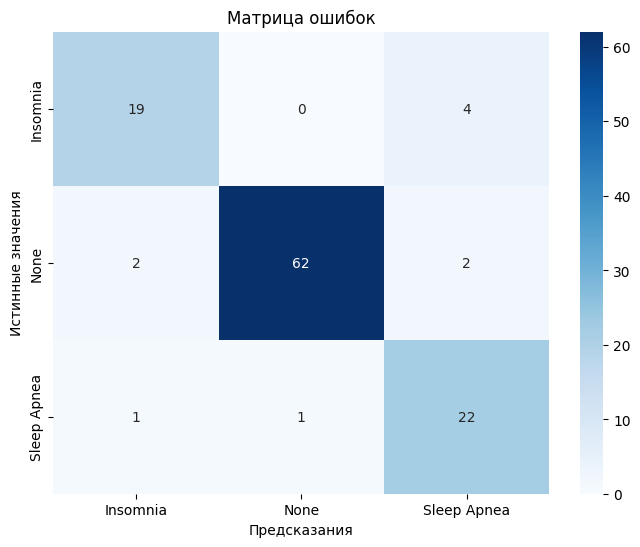


Анализ коэффициентов модели
                                 Insomnia      None  Sleep Apnea
Age                              0.599638 -0.335333    -0.264305
Sleep Duration                  -0.924136 -0.059686     0.983822
Quality of Sleep                -0.159755  0.307503    -0.147748
Physical Activity Level          0.103869 -0.065457    -0.038413
Stress Level                    -0.069776  0.158158    -0.088382
Heart Rate                      -0.403478 -0.544917     0.948395
Daily Steps                     -0.651034  0.139873     0.511161
Systolic                         0.278467 -0.319886     0.041420
Diastolic                        0.017177 -0.505381     0.488204
Gender_Male                      0.393203  0.155216    -0.548419
Occupation_Doctor               -0.426808  0.761575    -0.334766
Occupation_Engineer              0.186411  0.393988    -0.580398
Occupation_Lawyer               -0.104040  0.430929    -0.326890
Occupation_Manager              -0.237313  0.423054    -0.185

In [31]:
def evaluate_classification(y_true, y_pred, y_proba=None, classes_order=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    roc_auc = None
    if y_proba is not None:
        y_true_onehot = pd.get_dummies(y_true).values
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')
    cm = confusion_matrix(y_true, y_pred)

    print("Метрики классификации")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None: print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_order, yticklabels=classes_order)
    plt.title('Матрица ошибок'); plt.xlabel('Предсказания'); plt.ylabel('Истинные значения'); plt.show()


y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

evaluate_classification(y_test, y_pred, y_proba, classes_order=model.classes_)

print("\nАнализ коэффициентов модели")
coefs_df = pd.DataFrame(model.coef_, columns=X_train.columns, index=model.classes_).T
print(coefs_df)

Построенная модель логистической регрессии показала высокую эффективность. Ключевые метрики на тестовой выборке:

* Accuracy (общая точность): 0,91

* F1-score (баланс точности и полноты): 0,91

* ROC-AUC (качество различения классов): 0,95

Эти результаты подтверждают, что модель надежна и хорошо справляется с классификацией всех трех состояний: None (нет расстройства), Sleep Apnea (апноэ) и Insomnia (бессонница).

Анализ коэффициентов модели позволил выявить самые значимые признаки:

* Для Апноэ сна (Sleep Apnea): Наибольшее положительное влияние оказывают продолжительность сна и высокий пульс. Наличие нормального веса сильно снижает вероятность этого диагноза.

* Для Бессонницы (Insomnia): Основными факторами риска являются увеличение возраста и профессия продавца.

* Для Отсутствия расстройств (None): Главный и наиболее логичный признак - высокое качество сна.

